In [90]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [91]:
#  Find no. of factors in y
from collections import Counter
# label encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.decomposition import PCA

In [92]:
# Import All classifcation Algorithms
from xgboost import XGBClassifier

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Metrics selection
from sklearn.metrics import  accuracy_score, confusion_matrix,classification_report

In [95]:
from sklearn.externals import joblib

# Import the data files

In [96]:
# read data file
df1 = pd.read_csv('2_SalesEffect_Cleaned_Encoded.csv')
print(df1.shape)

(6574, 6)


In [97]:
# Assign variables
X1 = df1.iloc[:,:-1]
y1 = pd.DataFrame(df1.y_Status)

print(X1.shape)
print(Counter(df1.y_Status))

(6574, 5)
Counter({0: 3727, 1: 1350, 3: 852, 2: 645})


In [98]:
# Split 60:40
split_seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=split_seed, test_size=.40)

In [99]:
# Create Column Lists
# Create All lists
AllColumns = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode', 'y_Status']

# No Continuous Columns
ConVarList=[]

CatVarList = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode']

OutcomeVar=['y_Status']


In [100]:
model = XGBClassifier(booster='gbtree',
                      random_state=155,
                      learning_rate=0.05,
                      max_depth=5,
                      min_child_weight=2,
                      gamma = 0.1,
                      colsample_bytree=0.7,
                      scoring='accuracy'
                     )
model.fit(X1_train, y1_train)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=155, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, scoring='accuracy', seed=None,
       silent=True, subsample=1)

In [101]:
# Results
y1_predict = model.predict(X1_test)
print(confusion_matrix(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict).round(4)*100)
print(classification_report(y1_test,y1_predict))
Counter(y1_train.y_Status)

[[1343  108   14   26]
 [ 305  205    1   28]
 [ 171   47   19   11]
 [ 189   69    8   86]]
62.849999999999994
              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1491
           1       0.48      0.38      0.42       539
           2       0.45      0.08      0.13       248
           3       0.57      0.24      0.34       352

   micro avg       0.63      0.63      0.63      2630
   macro avg       0.54      0.40      0.42      2630
weighted avg       0.60      0.63      0.58      2630



Counter({1: 811, 0: 2236, 3: 500, 2: 397})

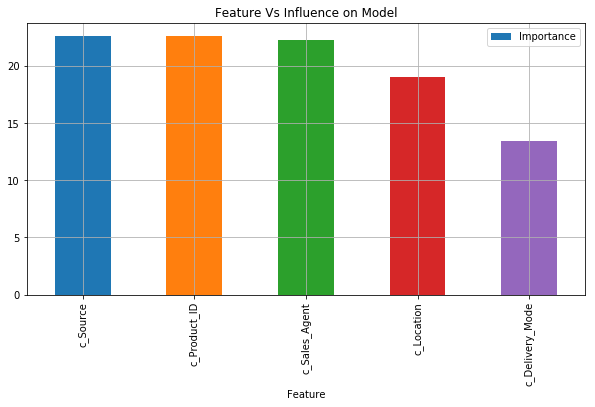

In [102]:
FeatureImportance1 = pd.DataFrame({'Feature':CatVarList,'Importance':model.feature_importances_*100})

FeatureImportance1 = FeatureImportance1.sort_values(by='Importance', axis=0, ascending=False)


FeatureImportance1.plot(x='Feature',
            y='Importance',
            kind='bar',
            grid=True,
            title="Feature Vs Influence on Model",
            legend = True,
            figsize = (10,5)
            )

In [ ]:
# Dump the churn Model
joblib.dump(model,'SalesEffectivenessTrainedModel1.ml')

# Try Smoting

In [87]:
split_seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=split_seed, test_size=.40)
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X1_train_smote, y1_train_smote = smote.fit_sample(X1_train,y1_train)

X1_train_smote = pd.DataFrame(X1_train_smote,columns=CatVarList)

print(Counter(y1_train.y_Status))
print(Counter(y1_train_smote))

Counter({0: 2236, 1: 811, 3: 500, 2: 397})
Counter({1: 2236, 0: 2236, 3: 2236, 2: 2236})


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
model = XGBClassifier(booster='gbtree',
                      random_state=155,
                      learning_rate=0.05,
                      max_depth=5,
                      min_child_weight=2,
                      gamma = 0.1,
                      colsample_bytree=0.7,
                      scoring='accuracy'
                     )
model.fit(X1_train_smote, y1_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=155, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, scoring='accuracy', seed=None,
       silent=True, subsample=1)

In [89]:
# Results
y1_predict = model.predict(X1_test)
print(confusion_matrix(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict).round(4)*100)
print(classification_report(y1_test,y1_predict))

[[880 260 212 139]
 [123 261  68  87]
 [ 70  64  71  43]
 [ 40  76  69 167]]
52.43
              precision    recall  f1-score   support

           0       0.79      0.59      0.68      1491
           1       0.39      0.48      0.44       539
           2       0.17      0.29      0.21       248
           3       0.38      0.47      0.42       352

   micro avg       0.52      0.52      0.52      2630
   macro avg       0.43      0.46      0.44      2630
weighted avg       0.60      0.52      0.55      2630

